In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#对中文字符的处理
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
#让坐标轴能够正常显示正负号
plt.rcParams['axes.unicode_minus']

True

In [37]:
data=pd.read_csv("data.csv")

- 该数据集对应的主要任务是，在给定客户和航班相关信息的条件下，预测未来的客户是否会满意他们的服务。



- 此外，航空公司还需要知道，他们所提供的服务的哪些方面必须得到更多的重视，以提升客户的满意程度。




- 需要注意的是，除了数据集中已经显示的信息，可能还有一些其他的分析途径。

### 修改列名

In [38]:
name=['客户ID','性别','顾客类型','年龄','飞行类型','class','飞行距离','机上wifi服务','出发/到达时间','方便在线预订','登机口位置','餐饮','在线登机','座位舒适度','机上娱乐','机上服务','腿部空间服务','行李处理','值机服务','机上服务','清洁度','离港延迟分钟数','到达延迟分钟数','满足']

In [39]:
data.columns=name

In [40]:
data.columns

Index(['客户ID', '性别', '顾客类型', '年龄', '飞行类型', 'class', '飞行距离', '机上wifi服务',
       '出发/到达时间', '方便在线预订', '登机口位置', '餐饮', '在线登机', '座位舒适度', '机上娱乐', '机上服务',
       '腿部空间服务', '行李处理', '值机服务', '机上服务', '清洁度', '离港延迟分钟数', '到达延迟分钟数', '满足'],
      dtype='object')

### 初步查看

In [41]:
data.describe()

,客户ID,年龄,飞行距离,机上wifi服务,出发/到达时间,方便在线预订,登机口位置,餐饮,在线登机,座位舒适度,机上娱乐,机上服务,腿部空间服务,行李处理,值机服务,机上服务,清洁度,离港延迟分钟数,到达延迟分钟数,满足
count,129880.000000,129880.000000,129880.000000,129876.000000,129876.000000,129877.000000,129872.000000,129875.000000,129874.000000,129879.000000,129876.000000,129877.000000,129878.000000,129878.000000,129877.000000,129879.000000,129878.000000,129880.000000,129487.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,2.728703,3.057609,2.756885,2.976931,3.204805,3.252599,3.441349,3.358080,3.383016,3.350891,3.632132,3.306251,3.642213,3.286315,14.713713,15.091129,0.434463
std,37493.270818,15.119360,997.452477,1.329334,1.526757,1.401742,1.278526,1.329917,1.350718,1.319287,1.334033,1.287106,1.316245,1.180024,1.266189,1.176651,1.313689,38.071126,38.465650,0.495688
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


###  数据缺失

#### 查看

In [44]:
len(data)

129880

In [45]:
data.isnull().sum()

#15个特征具有缺失值

客户ID          0
性别            0
顾客类型          0
年龄            0
飞行类型          0
class         0
飞行距离          0
机上wifi服务      4
出发/到达时间       4
方便在线预订        3
登机口位置         8
餐饮            5
在线登机          6
座位舒适度         1
机上娱乐          4
机上服务          3
腿部空间服务        2
行李处理          2
值机服务          3
机上服务          1
清洁度           2
离港延迟分钟数       0
到达延迟分钟数     393
满足            0
dtype: int64

#### 处理

- 先把缺失数量最大的删除

In [46]:
data=data.dropna()
data

,客户ID,性别,顾客类型,年龄,飞行类型,class,飞行距离,机上wifi服务,出发/到达时间,方便在线预订,...,机上娱乐,机上服务,腿部空间服务,行李处理,值机服务,机上服务,清洁度,离港延迟分钟数,到达延迟分钟数,满足
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3.0,3.0,3.0,...,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0,0.0,0
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4.0,4.0,4.0,...,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0,0.0,1
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2.0,5.0,1.0,...,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0,0.0,0
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3.0,3.0,3.0,...,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0,0.0,1


In [47]:
data.isnull().sum()

客户ID        0
性别          0
顾客类型        0
年龄          0
飞行类型        0
class       0
飞行距离        0
机上wifi服务    0
出发/到达时间     0
方便在线预订      0
登机口位置       0
餐饮          0
在线登机        0
座位舒适度       0
机上娱乐        0
机上服务        0
腿部空间服务      0
行李处理        0
值机服务        0
机上服务        0
清洁度         0
离港延迟分钟数     0
到达延迟分钟数     0
满足          0
dtype: int64

**原先数据量129880，现在的数据量129447，数据删除对整体的影响不大**

### 重复数据处理

In [48]:
#查找重复值
#两列以上的数量，每列数据都想吐就会判定重复

data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129447, dtype: bool

**无重复数据**

- 可以查看每一列的取值种类

### 异常值处理

- 查找

In [49]:
data.describe()

,客户ID,年龄,飞行距离,机上wifi服务,出发/到达时间,方便在线预订,登机口位置,餐饮,在线登机,座位舒适度,机上娱乐,机上服务,腿部空间服务,行李处理,值机服务,机上服务,清洁度,离港延迟分钟数,到达延迟分钟数,满足
count,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000,129447.000000
mean,64954.995906,39.430292,1190.217425,2.728661,3.057444,2.756904,2.976994,3.204709,3.252698,3.441748,3.358131,3.383222,3.351209,3.631880,3.306218,3.642371,3.286287,14.643762,15.091304,0.434533
std,37490.218854,15.117463,997.564888,1.329240,1.526797,1.401677,1.278536,1.329899,1.350680,1.319104,1.334133,1.287054,1.316112,1.180091,1.266148,1.176621,1.313590,37.936057,38.468550,0.495697
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32492.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64966.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97412.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [50]:
data.head()

,客户ID,性别,顾客类型,年龄,飞行类型,class,飞行距离,机上wifi服务,出发/到达时间,方便在线预订,...,机上娱乐,机上服务,腿部空间服务,行李处理,值机服务,机上服务,清洁度,离港延迟分钟数,到达延迟分钟数,满足
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1


- 用**箱线图**反映数据的异常情况

In [51]:
#由于有几个特征的数值是字符类型，需要把非数字类型的去除
# 由于id也不是取决元素之一，那么就一同删除
data_1=data.drop(['客户ID','性别','顾客类型','飞行类型','class'],axis=1,inplace=False)

In [52]:
data_1.head()

,年龄,飞行距离,机上wifi服务,出发/到达时间,方便在线预订,登机口位置,餐饮,在线登机,座位舒适度,机上娱乐,机上服务,腿部空间服务,行李处理,值机服务,机上服务,清洁度,离港延迟分钟数,到达延迟分钟数,满足
0,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,25,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,26,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,25,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,61,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1


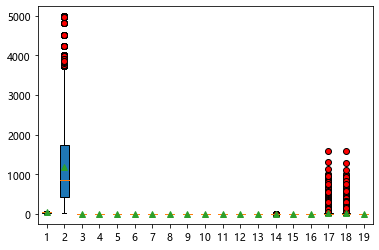

In [57]:
plt.boxplot(data_1,
           patch_artist=True,#用自定义的颜色显示均值
           showmeans=True,#以点的形式显示均值
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'}
           #设置异常值属性，点的颜色，填充色以及边框色
           )
plt.show()

**发现 飞行距离，离港延迟分钟数，到达延迟分钟数有离群值**

In [58]:
# 飞行距离可以用>3000去除
data=data.drop(data[data.飞行距离>3000].index,inplace=False)

In [59]:
#计算下四分位数和上四分位
Q1=data['离港延迟分钟数'].value_counts().quantile(q=0.25)
Q2=data['离港延迟分钟数'].value_counts().quantile(q=0.75)
#计算上下限
low_whisker=Q1-1.5*(Q2-Q1)#<0
up_whisker=Q2+1.5*(Q2-Q1)
#寻找异常点并且删除
#之前查看过，没有小于0的数
data=data.drop(data[data.离港延迟分钟数>up_whisker].index,inplace=False)
data=data.drop(data[data.离港延迟分钟数<low_whisker].index,inplace=False)

In [60]:
#计算下四分位数和上四分位
Q1=data['到达延迟分钟数'].value_counts().quantile(q=0.25)
Q2=data['到达延迟分钟数'].value_counts().quantile(q=0.75)
#计算上下限
low_whisker=Q1-1.5*(Q2-Q1)#<0
up_whisker=Q2+1.5*(Q2-Q1)

data=data.drop(data[data.到达延迟分钟数>up_whisker].index,inplace=False)
data=data.drop(data[data.到达延迟分钟数<low_whisker].index,inplace=False)

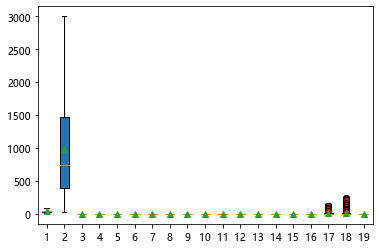

In [61]:
#再画一次

data_1=data.drop(['客户ID','性别','顾客类型','飞行类型','class'],axis=1,inplace=False)
plt.boxplot(data_1,
           patch_artist=True,#用自定义的颜色显示均值
           showmeans=True,#以点的形式显示均值
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'}
           #设置异常值属性，点的颜色，填充色以及边框色
           )
plt.show()

**这说明后面两个特征没有按照正态分布**

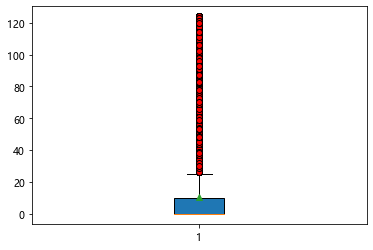

In [62]:
plt.boxplot(data_1['离港延迟分钟数'],
           patch_artist=True,#用自定义的颜色显示均值
           showmeans=True,#以点的形式显示均值
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'}
           #设置异常值属性，点的颜色，填充色以及边框色
           )
plt.show()

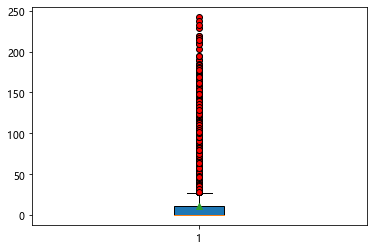

In [63]:
plt.boxplot(data_1['到达延迟分钟数'],
           patch_artist=True,#用自定义的颜色显示均值
           showmeans=True,#以点的形式显示均值
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'}
           #设置异常值属性，点的颜色，填充色以及边框色
           )
plt.show()

In [64]:
#去除离群值后的数表
#116502
data.head()
129447-116502
#删除的数据量

12945

## 独热编码

In [65]:
columns=pd.get_dummies(data.性别)
data=pd.concat([data,columns],axis=1)
data=data.drop('性别',axis=1)

columns=pd.get_dummies(data.飞行类型)
data=pd.concat([data,columns],axis=1)
data=data.drop('飞行类型',axis=1)

columns=pd.get_dummies(data['class'])
data=pd.concat([data,columns],axis=1)
data=data.drop('class',axis=1)

columns=pd.get_dummies(data['顾客类型'])
data=pd.concat([data,columns],axis=1)
data=data.drop('顾客类型',axis=1)

#调换一下列的顺序
df=data['满足']
data=data.drop('满足',axis=1)
data.insert(0,'满足',df)

data.columns

Index(['满足', '客户ID', '年龄', '飞行距离', '机上wifi服务', '出发/到达时间', '方便在线预订', '登机口位置',
       '餐饮', '在线登机', '座位舒适度', '机上娱乐', '机上服务', '腿部空间服务', '行李处理', '值机服务', '机上服务',
       '清洁度', '离港延迟分钟数', '到达延迟分钟数', 'Female', 'Male', 'Business travel',
       'Personal Travel', 'Business', 'Eco', 'Eco Plus', 'Loyal Customer',
       'disloyal Customer'],
      dtype='object')

In [66]:
#data=data.drop('客户ID',axis=1)
data=data.drop('机上服务',axis=1)

## 查看特征系数

In [67]:
#计算相关系数
def cal_coefficient (data):
    #我要预测的值在columns第一个
    x,y=data.iloc[:,1:],data.iloc[:,0]
    cor_list=[]
    for i in x.columns.tolist():
        print(x[i].head())
        #numpy有计算相关系数的函数
        cor=np.corrcoef(x[i],y)
        print(cor)
        print("")
        #cor_list.append(cor)
    #return cor_list

In [68]:

cal_coefficient(data)

0     70172
1      5047
2    110028
3     24026
4    119299
Name: 客户ID, dtype: int64
[[1.         0.00691385]
 [0.00691385 1.        ]]

0    13
1    25
2    26
3    25
4    61
Name: 年龄, dtype: int64
[[1.         0.12161898]
 [0.12161898 1.        ]]

0     460
1     235
2    1142
3     562
4     214
Name: 飞行距离, dtype: int64
[[1.         0.23405019]
 [0.23405019 1.        ]]

0    3.0
1    3.0
2    2.0
3    2.0
4    3.0
Name: 机上wifi服务, dtype: float64
[[1.         0.30153542]
 [0.30153542 1.        ]]

0    4.0
1    2.0
2    2.0
3    5.0
4    3.0
Name: 出发/到达时间, dtype: float64
[[ 1.         -0.05361361]
 [-0.05361361  1.        ]]

0    3.0
1    3.0
2    2.0
3    5.0
4    3.0
Name: 方便在线预订, dtype: float64
[[1.         0.18102366]
 [0.18102366 1.        ]]

0    1.0
1    3.0
2    2.0
3    5.0
4    3.0
Name: 登机口位置, dtype: float64
[[ 1.         -0.00406159]
 [-0.00406159  1.        ]]

0    5.0
1    1.0
2    5.0
3    2.0
4    4.0
Name: 餐饮, dtype: float64
[[1.         0.19535988]
 [0.19535988

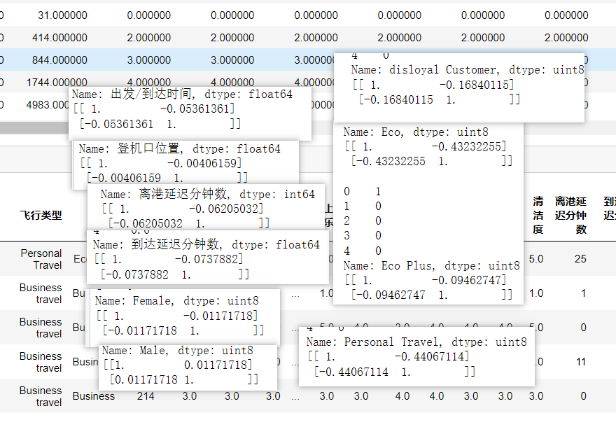

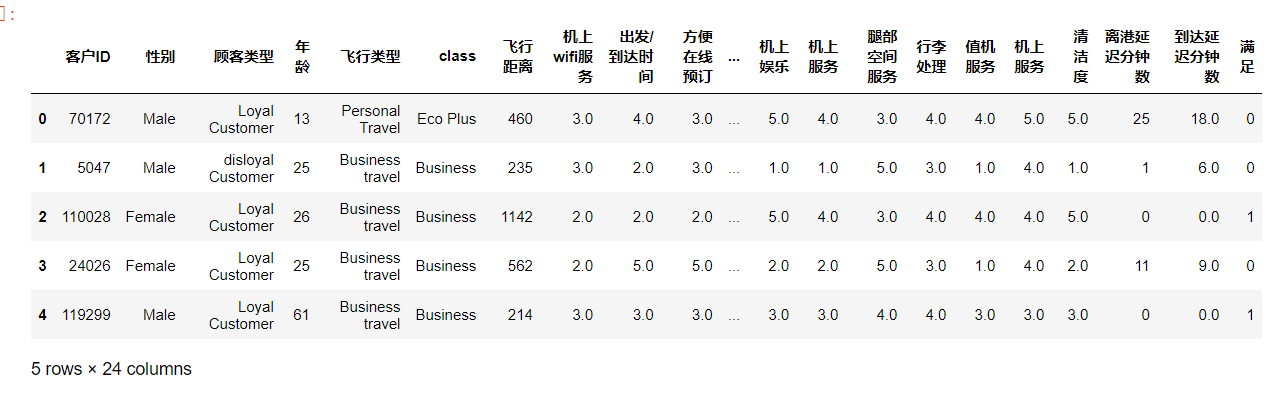

**则需要删除的是性别，出发时间，登机口位置，延迟时间，到达延迟时间，class，顾客类型**

In [69]:
data.columns

Index(['满足', '客户ID', '年龄', '飞行距离', '机上wifi服务', '出发/到达时间', '方便在线预订', '登机口位置',
       '餐饮', '在线登机', '座位舒适度', '机上娱乐', '腿部空间服务', '行李处理', '值机服务', '清洁度',
       '离港延迟分钟数', '到达延迟分钟数', 'Female', 'Male', 'Business travel',
       'Personal Travel', 'Business', 'Eco', 'Eco Plus', 'Loyal Customer',
       'disloyal Customer'],
      dtype='object')

In [70]:
data=data.drop(['出发/到达时间','登机口位置','离港延迟分钟数','到达延迟分钟数','Female', 'Male','Loyal Customer','Eco', 'disloyal Customer','Business', 'Eco Plus','Business travel', 'Personal Travel'],axis=1)

In [72]:
data

,满足,客户ID,年龄,飞行距离,机上wifi服务,方便在线预订,餐饮,在线登机,座位舒适度,机上娱乐,腿部空间服务,行李处理,值机服务,清洁度
0,0,70172,13,460,3.0,3.0,5.0,3.0,5.0,5.0,3.0,4.0,4.0,5.0
1,0,5047,25,235,3.0,3.0,1.0,3.0,1.0,1.0,5.0,3.0,1.0,1.0
2,1,110028,26,1142,2.0,2.0,5.0,5.0,5.0,5.0,3.0,4.0,4.0,5.0
3,0,24026,25,562,2.0,5.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,2.0
4,1,119299,61,214,3.0,3.0,4.0,5.0,5.0,3.0,4.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,78463,34,526,3.0,3.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,4.0
129876,1,71167,23,646,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0
129877,0,37675,17,828,2.0,1.0,2.0,1.0,2.0,2.0,3.0,4.0,5.0,2.0
129878,1,90086,14,1127,3.0,3.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0


## 转化类型

**全部转化为int类型**

In [73]:
def change_type (data):
    for i in data.columns.tolist():
        data[i]=data[i].astype('int')
    return data
change_type(data)

,满足,客户ID,年龄,飞行距离,机上wifi服务,方便在线预订,餐饮,在线登机,座位舒适度,机上娱乐,腿部空间服务,行李处理,值机服务,清洁度
0,0,70172,13,460,3,3,5,3,5,5,3,4,4,5
1,0,5047,25,235,3,3,1,3,1,1,5,3,1,1
2,1,110028,26,1142,2,2,5,5,5,5,3,4,4,5
3,0,24026,25,562,2,5,2,2,2,2,5,3,1,2
4,1,119299,61,214,3,3,4,5,5,3,4,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,78463,34,526,3,3,4,3,4,4,2,4,4,4
129876,1,71167,23,646,4,4,4,4,4,4,5,5,5,4
129877,0,37675,17,828,2,1,2,1,2,2,3,4,5,2
129878,1,90086,14,1127,3,3,4,4,4,4,2,5,4,4


### 保存结果

In [74]:
data.to_csv("data_2_1_clean.csv")